 # <span style='color:SteelBlue'> Analyse des données de systèmes éducatifs </span>

## Contexte
Data Scientist dans une **start-up de la EdTech** nommée **academy** qui propose des contenus de ***formation en ligne*** pour un ***public*** de ***niveau lycée et université*** il m'ai d'effectuer une analyse exploratoire afin de déterminer si les données sur l’éducation de la banque mondiale permettent d'etendre le projet sur d'autres pays.

Les principales questions que nous cherchons à resoudre sont:
- **Quels sont les pays avec un fort potentiel de clients pour nos services ?**
- **Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?**
- **Dans quels pays l'entreprise doit-elle opérer en priorité ?**

L'objectif général de cette étude est d'éffectuer une analyse pré-exploratoire sur les jeux de données de la banque mondiale afin d'orienter la Start-up dans ses décisions d'ouverture vers de nouveaux pays. Plus specifiquement, il s'agit de:
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

## Import des librairies

In [1]:
import numpy as np
import pandas as pd
from pandas.core.reshape.pivot import pivot_table
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

## Import des jeux de données

In [2]:
EdStatsCountry=pd.read_csv('EdStatsCountry.csv',sep=',' )
EdStatsCountry_Series=pd.read_csv('EdStatsCountry-Series.csv',sep=',' )
EdStatsData=pd.read_csv('EdStatsData.csv',sep=',' )
EdStatsFootNote=pd.read_csv('EdStatsFootNote.csv',sep=',' )
EdStatsSeries=pd.read_csv('EdStatsSeries.csv',sep=',' )

## Validation de la qualité des bases de données

### Recherche et suppression des colonnes vides

In [3]:
EdStatsCountry['Unnamed: 31'].isnull().all()

True

In [4]:
# Find the columns where each value is null
def base(df):
    for col in df.columns : 
        if df[col].isnull().all() :
            print('Presence de colonne vide')
            return
    return 'Pas de colonne vide'

In [5]:
base(EdStatsCountry)
base(EdStatsCountry_Series)
base(EdStatsData)
base(EdStatsFootNote)
base(EdStatsSeries)

Presence de colonne vide
Presence de colonne vide
Presence de colonne vide
Presence de colonne vide
Presence de colonne vide


### Description des informations contenues dans les jeux de données

In [6]:
type(EdStatsCountry)

pandas.core.frame.DataFrame

### Nombre de lignes et de colonnes

In [7]:
# Nombre de lignes et de colonnes
nb_lignes = len(EdStatsCountry.axes[0])
nb_colonnes = len(EdStatsCountry.axes[1])
  
# Affichage du nombre de ligne et colonnes
print("Nombre de lignes: " + str(nb_lignes))
print("Nombre de colonnes: " + str(nb_colonnes))

Nombre de lignes: 241
Nombre de colonnes: 32


### Données manquantes

#### Comptage du nombre de données manquantes

In [8]:
EdStatsData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

On une colonne vide nommé Unamed qui se trouve dans toutes les bases qu'on doit supprimés durant l'importation des données

#### Pourcentage de données manquantes

In [9]:
(EdStatsCountry.isna().sum().sum()/(EdStatsCountry.size))*100

30.52385892116183

#### Compter le nombre de données dupliquées

In [10]:
len(EdStatsCountry)-len(EdStatsCountry.drop_duplicates())

0

#### Pourcentage de données dupliquées

In [11]:
((len(EdStatsCountry)-len(EdStatsCountry.drop_duplicates()))/len(EdStatsCountry.axes[0]))*100

0.0

## Resumés

### Données EdStatsCountry

In [12]:
print(f'''La base EdStatsCountry contient des données économiques par pays et par regions selon leur dernière année de recensement.
Elle est composé de {len(EdStatsCountry.axes[0])} lignes et {len(EdStatsCountry.axes[1])} variables.On compte {EdStatsCountry.isna().sum().sum()} données manquantes dans cette base soit {(EdStatsCountry.isna().sum().sum()/(EdStatsCountry.size))*100:.2f}%. 
Le nombre de données en double est de {len(EdStatsCountry)-len(EdStatsCountry.drop_duplicates())} soit un pourcentage de ({((len(EdStatsCountry)-len(EdStatsCountry.drop_duplicates()))/len(EdStatsCountry.axes[0]))*100:.2f}%)''')

La base EdStatsCountry contient des données économiques par pays et par regions selon leur dernière année de recensement.
Elle est composé de 241 lignes et 32 variables.On compte 2354 données manquantes dans cette base soit 30.52%. 
Le nombre de données en double est de 0 soit un pourcentage de (0.00%)


La colonne **Unnamed** contient 241 valeurs manquantes (100%); c'est donc une colonne vide qui doit être supprimé si toutefois on devrait utilisé cette base.

### Données EdStatsCountry_Series

In [13]:
print(f'''La base EdStatsCountry_Series contient des données sur la source des indicateurs par pays.
Elle est composé de {len(EdStatsCountry_Series.axes[0])} lignes et {len(EdStatsCountry_Series.axes[1])} variables. On compte {EdStatsCountry_Series.isna().sum().sum()} données manquantes dans cette base soit {(EdStatsCountry_Series.isna().sum().sum()/(EdStatsCountry_Series.size))*100:.2f}%.
Le nombre de données en double est de {len(EdStatsCountry_Series)-len(EdStatsCountry_Series.drop_duplicates())} soit un pourcentage de ({((len(EdStatsCountry_Series)-len(EdStatsCountry_Series.drop_duplicates()))/len(EdStatsCountry_Series.axes[0]))*100:.2f}%)''')

La base EdStatsCountry_Series contient des données sur la source des indicateurs par pays.
Elle est composé de 613 lignes et 4 variables. On compte 613 données manquantes dans cette base soit 25.00%.
Le nombre de données en double est de 0 soit un pourcentage de (0.00%)


In [14]:
EdStatsCountry_Series.isna().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

La colonne **Unnamed** contient 613 valeurs manquantes (100%); c'est donc une colonne vide qui doit être supprimé si toutefois on devrait utilisé cette base.

### Données EdStatsData

In [15]:
print(f'''La base EdStatsData contient des données sur la projection des indicateurs par pays.
Elle est composé de {len(EdStatsData.axes[0])} lignes et {len(EdStatsData.axes[1])} variables.On compte {EdStatsData.isna().sum().sum()} données manquantes dans cette base soit {(EdStatsData.isna().sum().sum()/(EdStatsData.size))*100:.2f}%.
Le nombre de données en double est de {len(EdStatsData)-len(EdStatsData.drop_duplicates())} soit un pourcentage de ({((len(EdStatsData)-len(EdStatsData.drop_duplicates()))/len(EdStatsData.axes[0]))*100:.2f}%)''')

La base EdStatsData contient des données sur la projection des indicateurs par pays.
Elle est composé de 886930 lignes et 70 variables.On compte 53455179 données manquantes dans cette base soit 86.10%.
Le nombre de données en double est de 0 soit un pourcentage de (0.00%)


In [16]:
EdStatsData.isna().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

La colonne **Unnamed** est une colonne vide qui doit être supprimé si toutefois on devrait utilisé cette base.

### Données EdStatsFootNote

In [17]:
print(f'''Elle contient des données sur la mise à jour et description des differentes indicateurs par pays et par année.
Elle est composé de {len(EdStatsFootNote.axes[0])} lignes et {len(EdStatsFootNote.axes[1])} variables. On compte {EdStatsFootNote.isna().sum().sum()} données manquantes dans cette base soit {(EdStatsFootNote.isna().sum().sum()/(EdStatsFootNote.size))*100:.2f}%. 
Le nombre de données en double est de {len(EdStatsFootNote)-len(EdStatsFootNote.drop_duplicates())} soit un pourcentage de ({((len(EdStatsFootNote)-len(EdStatsFootNote.drop_duplicates()))/len(EdStatsFootNote.axes[0]))*100:.2f}%)''')

Elle contient des données sur la mise à jour et description des differentes indicateurs par pays et par année.
Elle est composé de 643638 lignes et 5 variables. On compte 643638 données manquantes dans cette base soit 20.00%. 
Le nombre de données en double est de 0 soit un pourcentage de (0.00%)


In [18]:
EdStatsFootNote.isna().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

La colonne **Unnamed** est donc une colonne vide qui doit être supprimé si toutefois on devrait utilisé cette base.

### Données EdStatsSeries

In [19]:
print(f'''La base EdStatsSeries nous renseigne sur les descriptions et les sources des differentes thèmes d'indicateurs socio-economiques et socio-démographiques.
Elle est composé de {len(EdStatsSeries.axes[0])} lignes et {len(EdStatsSeries.axes[1])} variables. On compte {EdStatsSeries.isna().sum().sum()} données manquantes dans cette base soit {(EdStatsSeries.isna().sum().sum()/(EdStatsSeries.size))*100:.2f}%. 
Le nombre de données en double est de {len(EdStatsSeries)-len(EdStatsSeries.drop_duplicates())} soit un pourcentage de ({((len(EdStatsSeries)-len(EdStatsSeries.drop_duplicates()))/len(EdStatsSeries.axes[0]))*100:.2f}%) ''')

La base EdStatsSeries nous renseigne sur les descriptions et les sources des differentes thèmes d'indicateurs socio-economiques et socio-démographiques.
Elle est composé de 3665 lignes et 21 variables. On compte 55203 données manquantes dans cette base soit 71.72%. 
Le nombre de données en double est de 0 soit un pourcentage de (0.00%) 


In [20]:
EdStatsSeries.isna().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

Après analyse des 05 bases de données, nous retenons les bases **EdStatsCountry_Series, EdStatsCountry** et **EdStatsData** pour la suite de l'analyse

## Choix des indicateurs

**IT.CMP.PCMP.P2** : Les ordinateurs personnels sont des ordinateurs autonomes conçus pour être utili
    sés par une seule personne.
    

**IT.NET.USER.P2**: Les utilisateurs de l'internet sont des personnes qui ont utilisé l'internet (depuis n'importe quel endroit) au cours des trois derniers mois. L'internet peut être utilisé via un ordinateur, un téléphone mobile, un assistant numérique personnel, une machine de jeux, une télévision numérique, etc.

**NY.GDP.PCAP.CD** : Le PIB par habitant.

**NY.GNP.PCAP.CD**: Revenu national brut pa habitant par habitant (anciennement PNB par habitant) est le revenu national brut, converti en dollars américains selon la méthode Atlas de la Banque mondiale, divisé par la population en milieu d'année. 

**SE.SEC.ENRL**: Nombre total d'étudiants inscrits dans les établissements d'enseignement secondaire publics et privés, quel que soit leur âge.

**SE.SEC.ENRR**: Effectif total de l'enseignement secondaire, quel que soit l'âge, exprimé en pourcentage de la population en âge de suivre un enseignement secondaire officiel. Le TBS peut dépasser 100 % en raison de l'inclusion d'étudiants trop âgés ou pas assez âgés en raison d'une entrée précoce ou tardive à l'école et d'un redoublement.

**SE.SEC.ENRR.UP**: Nombre total d'inscriptions dans l'enseignement secondaire supérieur, quel que soit l'âge, exprimé en pourcentage de la population totale en âge de suivre un enseignement secondaire supérieur officiel.

**SE.TER.ENRL**: Le nombre total d'étudiants inscrits dans les établissements publics et privés d'enseignement supérieur.

**SP.POP.1524.TO.UN**: Population, âges 15-24, total est la population totale âgée de 15 à 24 ans.

**UIS.E.3**: Nombre total d'étudiants inscrits dans les établissements publics et privés d'enseignement secondaire supérieur, quel que soit leur âge.

**UIS.PTRHC.3**: Ratio élèves-enseignant dans l'enseignement secondire (sur la base de l'effectif). 

**UIS.PTRHC.56**: Ratio élèves-enseignant dans l'enseignement supérieur (sur la base de l'effectif). 

### Regroupement des indicateurs

**Indicateurs socio-economiques**: IT.CMP.PCMP.P2, IT.NET.USER.P2,NY.GDP.PCAP.CD, NY.GNP.PCAP.CD

**Indicateurs socio-demographiques**:SE.SEC.ENRL, UIS.PTRHC.56, UIS.PTRHC.3,SP.POP.1524.TO.UN,SE.TER.ENRL,SE.SEC.ENRR.UP,SE.SEC.ENRR,SE.SEC.ENRL

*Le choix de ces indicateurs est fait en regardant les indicateurs ayant un lien avec la problématique. Mais, plus tard nous verrons si tous ces indicateurs sont aptes à entrer dans nos analyses.*

## Après le choix des indicateurs, nous allons faire une analyse approfondie de la base EdStatsData afin de voir si elle est exploitable en intégrité

In [21]:
#Comme nous l'avons signalé plus haut, nous devrons supprimé la variable
EdStatsData.drop(columns=['Unnamed: 69'],inplace=True)

In [22]:
#recuperation des variables qualitative:
EdStatsData_quali=EdStatsData.select_dtypes(exclude=[np.number])

In [23]:
#recuperation des variables qualitative:
EdStatsData_quanti=EdStatsData.select_dtypes(include=[np.number])

In [24]:
#Descriptions des données qualitative
EdStatsData_quali.describe()

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
freq,3665,3665,242,242


**Nous constatons de part et d'autre les mêmes nombre de pays et de code pays et tous les indicateurs ont des nommés**

In [25]:
EdStatsData_quanti.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.500000e+00,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.813670e+06,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06


### Valeurs manquantes par variable

AU niveau de la description des variables quantitatives, nous remarquons que les données varient de 1970 à 2100 et toutes les 
Toutes les colonnes contiennent des données de types int ou float.

En rappel cette base avait globalement au total 86,1% de données manquantes et ne contenait pas de données dupliquées

In [26]:
annee= EdStatsData.columns[4:]

In [27]:
annee=['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']

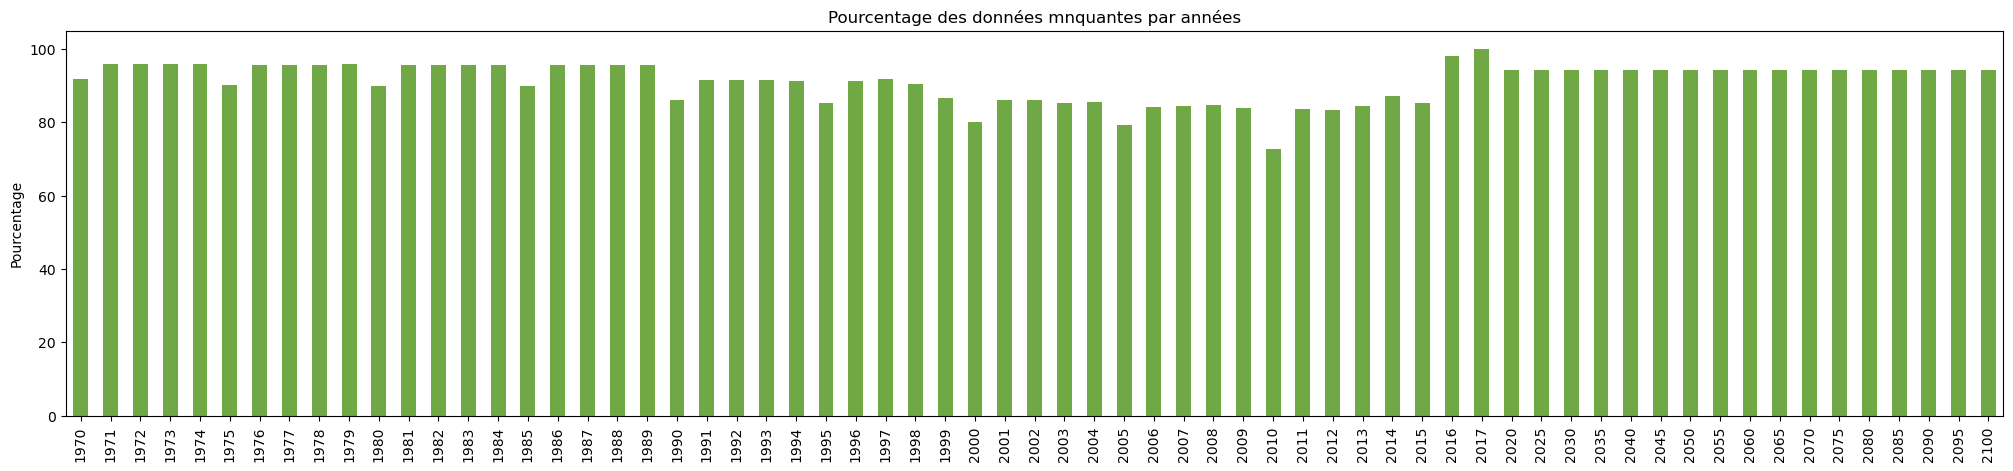

In [28]:
#rprésentation graphique des données manquantes par année
#colors = ["#bd5db0","#70a845","#727bcc","#b49242","#cc566c","#4aad92","#ca6037"]
plt.figure(figsize=(25,5))
nombre_valeur_manq = EdStatsData_quanti.isnull().sum()
nb_ligne=len(EdStatsData_quanti)
frequence = 100 * nombre_valeur_manq/nb_ligne
ax1 = frequence.plot(kind='bar', color='#70a845')
ax1.set_title('Pourcentage des données mnquantes par années')
ax1.set_ylabel('Pourcentage')
ax1.grid(False)

*Nous une remarquons un taux élevé de valeurs manquantes pour toutes les variables de la base EdStatsData qui varie entre 72% et 99%. les années 2016 et 2017 sont les années où il y a plus de données manquantes.Par ailleurs, Nous constatons qu'à partir de l'année 2020, le pourcentage de données manquantes reste constante jusqu'en 2100. Ce qui expliquerait qu'il s'agit des données estimés et pouvant être rétirer de notre base pour les beoins d'analyse*

### Données renseignées par années

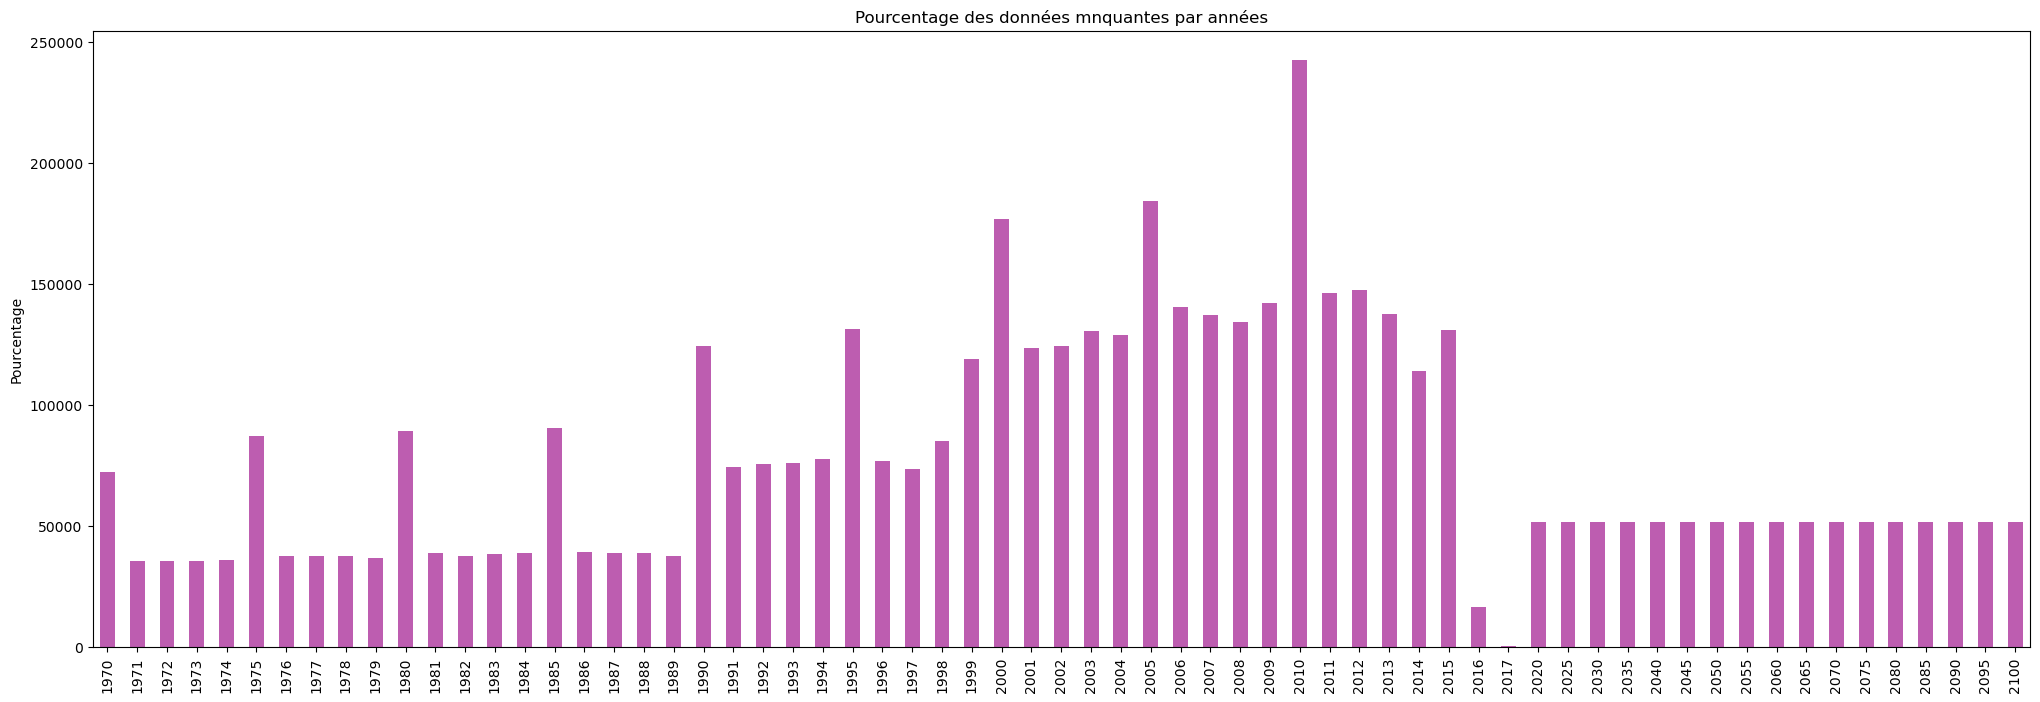

In [29]:
#rprésentation données renseignées par année
#colors = ["#bd5db0","#70a845","#727bcc","#b49242","#cc566c","#4aad92","#ca6037",SteelBlue]
plt.figure(figsize=(25,8))
valeur = EdStatsData_quanti.notnull().sum()
ax1 = valeur.plot(kind='bar', color='#bd5db0')
ax1.set_title('Pourcentage des données mnquantes par années')
ax1.set_ylabel('Pourcentage')
ax1.grid(False)

*En confirmation du graphique préccedent, les données de 2020 à 2100 correspondraient aux données estiméées et doivent être retirées pour la suite des analyses. Aussi celles de 2016 et 2017 doievent être aussi rétirés car il ya trop de données manquantes.*

*Nous remarquons qu'après chaque 04 ans, il y a un pic chaque 05 ans, nous allons donc representer les données par groupe de 15 ans pour mieux analyser.*

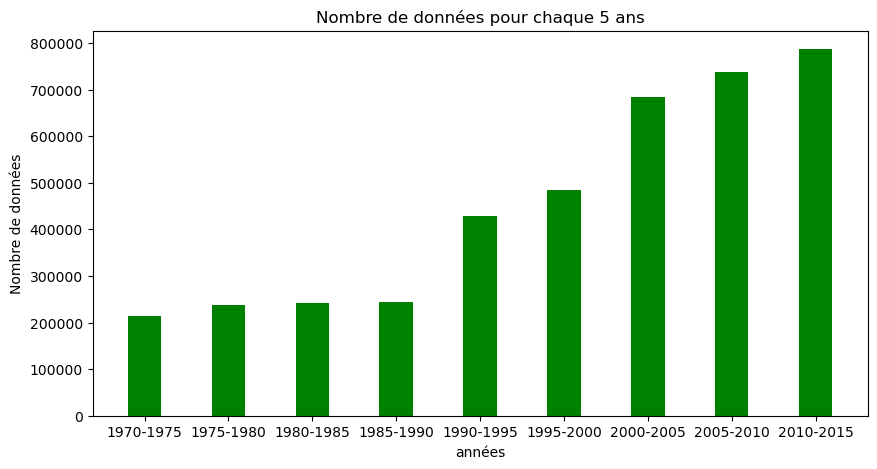

In [30]:
# Affihage de la répartition des données chaque 05 ans
plt.figure(figsize=(10,5))
nb_donnee=EdStatsData_quanti.loc[:,'1970':'2015'].copy().count()
don_trace=['1970-1975','1975-1980','1980-1985','1985-1990','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']
for i in range(9):
    j=i*5
    k=j+5
    nb_donnee[don_trace[i]]=nb_donnee[j:k,].sum()
plt.bar(nb_donnee[don_trace].index, nb_donnee[don_trace].values,width = 0.4, color='green')
plt.xlabel("années")
plt.ylabel("Nombre de données")
plt.title("Nombre de données pour chaque 5 ans")
plt.show()

*Nous constatons que les données sont mieux renseignées sur la période 2000 à 2015. Par ailleurs, dans le but de conserver les données recentes pour la suite de l'étude, nous allons filtrer nos données sur la période **2005 à 2015**.*

In [31]:

annees=EdStatsData.columns[4:]
tab_df = EdStatsData.groupby(['Country Name']).count()[annees]

In [32]:
gp = EdStatsData.groupby(['Country Name']).count() # nbe de cases renseignées pour chaque pays et chaque année
gp_sum = gp[gp.columns[5:]].sum(axis=1) # nbe de cases renseignées pour chaque pays (ttes années cumulées)

In [33]:
gp_sum

Country Name
Afghanistan           15900
Albania               25429
Algeria               29759
American Samoa          918
Andorra                7611
                      ...  
West Bank and Gaza    23183
World                 17216
Yemen, Rep.           14228
Zambia                24965
Zimbabwe              22386
Length: 242, dtype: int64

### Reduction temporelle et filtrage des indicateurs retenus

In [34]:
EdStatsData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

In [35]:
liste_des_colonnes = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
                      '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
                      '2013', '2014','2015']
base_final=EdStatsData[liste_des_colonnes]

In [36]:
# Liste des indicateurs
indicateurs=['SE.SEC.ENRL','SP.POP.1524.TO.UN','SE.TER.ENRL','SE.SEC.ENRR.UP','UIS.PTRHC.3', 'UIS.PTRHC.56','IT.CMP.PCMP.P2',
             'SE.SEC.ENRR','SE.SEC.ENRL', 'IT.NET.USER.P2','NY.GDP.PCAP.CD', 'NY.GNP.PCAP.CD']
base_final=base_final[base_final['Indicator Code'].isin(indicateurs)]

### Taux de remplissage des données par indicateurs et suppression de quelques indicateurs

In [37]:
# Taux de remplissage des indicateurs de 2005-2015
annees=['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012','2013', '2014','2015']
indicateurs=['SE.SEC.ENRL', 'UIS.PTRHC.56', 'UIS.PTRHC.3','SP.POP.1524.TO.UN','SE.TER.ENRL','SE.SEC.ENRR.UP',
             'SE.SEC.ENRR','SE.SEC.ENRL','IT.CMP.PCMP.P2', 'IT.NET.USER.P2','NY.GDP.PCAP.CD', 'NY.GNP.PCAP.CD']

#Nombre d'indicateur
taux_rempl_indicateur = base_final.groupby('Indicator Code')[annees].count().reset_index()
taux_rempl_indicateur ['nombre']=taux_rempl_indicateur [annees].sum(axis=1)

#taux de remplissage des indicateurs
taux_rempl_indicateur ['taux(%)']=round((taux_rempl_indicateur['nombre'])*100/(1*11*242),2)


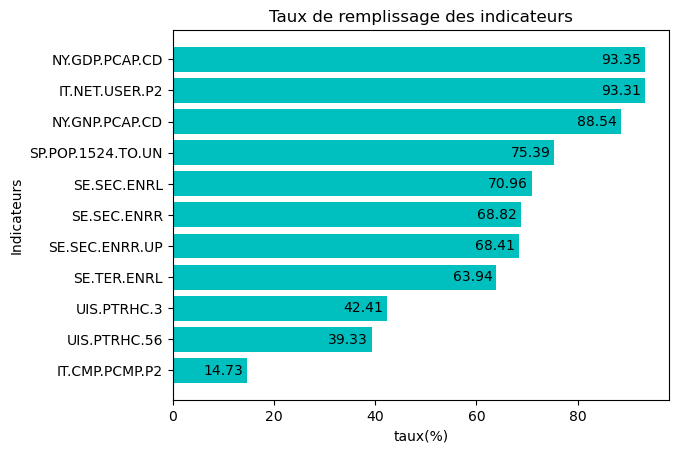

In [38]:
#representation graphique
taux_rempl_indicateur=taux_rempl_indicateur[["Indicator Code","taux(%)"]]
taux_rempl_indicateur.sort_values('taux(%)',inplace=True)
plt.barh(taux_rempl_indicateur["Indicator Code"],taux_rempl_indicateur["taux(%)"],color='c')
plt.xlabel("taux(%)")
plt.ylabel("Indicateurs")
plt.title("Taux de remplissage des indicateurs")

for y, x in enumerate(taux_rempl_indicateur["taux(%)"]): 
        plt.annotate(str(np.around(x,decimals=2)), xy=(x-0.75, y), va='center',ha='right', color='black', 
                     fontsize=10)
plt.show() 

*Nous remarquons que les indicateurs **UIS.PTRHC.3, UIS.PTRHC.56  et IT.CMP.PCMP.P2** ont tous moins de 50% de remplissage des données. Nous allons donc les supprimés afin de poursuivre l'analyse

In [39]:
# Liste des indicateurs
indicateurs=['SE.SEC.ENRL','SP.POP.1524.TO.UN','SE.TER.ENRL','SE.SEC.ENRR.UP',
             'SE.SEC.ENRR','SE.SEC.ENRL', 'IT.NET.USER.P2','NY.GDP.PCAP.CD', 'NY.GNP.PCAP.CD']
base_final=base_final[base_final['Indicator Code'].isin(indicateurs)]

In [40]:
base_final

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1191,Arab World,ARB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.810500e+07,2.830653e+07,2.849438e+07,2.893511e+07,2.957251e+07,3.013438e+07,3.129979e+07,3.181115e+07,3.125060e+07,3.097225e+07,NaN
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,6.899156e+06,7.214648e+06,7.588664e+06,8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,NaN
1245,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,3.796022e+03,4.414093e+03,5.046817e+03,6.255761e+03,5.267553e+03,6.032962e+03,7.005480e+03,7.571402e+03,7.715999e+03,NaN,NaN
1251,Arab World,ARB,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,3.497483e+03,4.112095e+03,4.730940e+03,5.546406e+03,5.640075e+03,5.913745e+03,6.305644e+03,7.196533e+03,NaN,NaN,NaN
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,6.593101e+01,6.584793e+01,6.469816e+01,6.534229e+01,6.682890e+01,6.805088e+01,7.069149e+01,7.171656e+01,7.027469e+01,7.073505e+01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884516,Zimbabwe,ZWE,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4.300000e+02,4.100000e+02,3.800000e+02,3.000000e+02,3.700000e+02,4.900000e+02,6.900000e+02,8.100000e+02,8.900000e+02,9.000000e+02,8.900000e+02
884600,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.667318e+01,4.757019e+01,NaN,NaN
884608,Zimbabwe,ZWE,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.623769e+01,3.696362e+01,NaN,NaN
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,2.400000e+00,2.400000e+00,3.000000e+00,3.500000e+00,4.000000e+00,6.400000e+00,8.400000e+00,1.200000e+01,1.550000e+01,1.636474e+01,2.274282e+01


### Verification et suppression des pays hors regroupement y compris les groupes de revenus

In [41]:
#Nombre de pays unique
base_final['Country Name'].nunique()

242

*Actuellement, il y a 195 pays au monde or nous en avons 242 dans notre base; ce qui n'est pas normal*

**Comparons les codes pays de la base EdStatsCountry_Series et de base_final**

In [42]:
base_final['Country Code'].nunique()

242

In [43]:
EdStatsCountry_Series['CountryCode'].nunique()

211

**Nous remarquons une diffence de 31 codes pays de part et d'autre**. 


*Nous allons rechercher les codes pays de de base_final qui ne sont pas dans EdStatsCountry_Series et vice versa*

In [44]:
d1=set(base_final['Country Code'].tolist())
d2=set(EdStatsCountry_Series['CountryCode'].tolist())
d=d1.difference(d2)
#d

In [45]:
d2.difference(d1)

set()

In [46]:
#Affichage du nom des pays ou groupes de pays/revenus dont les codes pays sont:
code_introuvable=['ARB','CUW', 'EAP', 'EAS', 'ECA', 'ECS', 'EMU', 'EUU',
 'HIC', 'HPC', 'LAC', 'LCN', 'LDC', 'LIC', 'LMC', 'LMY', 'MAF', 'MEA', 'MIC', 'MNA', 'NAC', 'NRU', 'OED', 'SAS', 'SSA',
 'SSD', 'SSF', 'SXM', 'UMC', 'VGB', 'WLD']

In [47]:
df=base_final[['Country Name']] [base_final['Country Code'].isin(code_introuvable)]

In [48]:
df['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'British Virgin Islands',
       'Curacao', 'Nauru', 'Sint Maarten (Dutch part)', 'South Sudan',
       'St. Martin (French part)'], dtype=object)

In [49]:
groupe_pays = ['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia','Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income','Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)','Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income','Middle East & North Africa',
       'Middle East & North Africa (excluding high income)','Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)','Upper middle income', 'World', 
        'British Virgin Islands','Curacao', 'Nauru', 'Sint Maarten (Dutch part)', 'South Sudan','St. Martin (French part)']

In [50]:
base_final.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015'],
      dtype='object')

 *Dans la base EdStatsData (base_final) qui contient les informations sur les indicateurs par année, par pays ou groupe de pays, nous allons ramener les regions et groupe de revenu depuis la base EdStatsCountry en effectuant une jointure à l'aide de la clé code pays*

### Extraction du code pays unique, region et groupe de revenu dans la base EdStatsCountry

In [51]:
pays_groupe={'Country Code' : EdStatsCountry['Country Code'].unique(), 
                                 'Region' : EdStatsCountry['Region'], 
                                 'Income Group' : EdStatsCountry['Income Group']}

In [52]:
type(pays_groupe)

dict

In [53]:
pays_groupe=pd.DataFrame.from_dict(pays_groupe)

In [54]:
pays_groupe.sample()

,Country Code,Region,Income Group
168,OED,NaN,NaN


### Fusion des données

In [55]:
df = pd.merge(pays_groupe,                        
                      base_final,
                      on = "Country Code",
                      how = "left")
df.sample()

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1584,SSA,NaN,NaN,Sub-Saharan Africa (excluding high income),"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,33560176.0,35498048.0,37214392.0,40428056.0,43595272.0,47268284.0,49768048.0,52063656.0,54097340.0,56130096.0,NaN


In [56]:
df['Region'].value_counts(normalize=True)*100

Europe & Central Asia         26.635514
Sub-Saharan Africa            22.429907
Latin America & Caribbean     19.158879
East Asia & Pacific           16.822430
Middle East & North Africa     9.813084
South Asia                     3.738318
North America                  1.401869
Name: Region, dtype: float64

In [57]:
df['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [58]:
df.sample()

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
351,COM,Sub-Saharan Africa,Low income,Comoros,"Population, ages 15-24, total",SP.POP.1524.TO.UN,166715.0,169040.0,171060.0,173051.0,175371.0,178281.0,181867.0,186055.0,190743.0,195750.0,200926.0


In [59]:
Region_pays=df.groupby('Region',dropna=False)[['Country Name']].count().sort_values(by='Country Name', ascending=False)
Region_pays

,Country Name
Region,
Europe & Central Asia,456
Sub-Saharan Africa,384
Latin America & Caribbean,328
East Asia & Pacific,288
NaN,216
Middle East & North Africa,168
South Asia,64
North America,24


*Nous remarquons qu'il ya quelques pays qui n'ont pas été affecté aux régions. Quels sont ces pays?*

In [60]:
df_2=df[['Country Name']][df['Region'].isnull()]

In [61]:
df_2['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area', 'European Union',
       'Gibraltar', 'High income',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Middle East & North Africa', 'Middle income',
       'Middle East & North Africa (excluding high income)',
       'North America', 'Nauru', 'OECD members', 'South Asia',
       'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
       'Upper middle income', 'World'], dtype=object)

*Les pays dont les régions n'ont pas été affectés peuvent être supprimé dans la colonne nom des pays*

In [62]:
Revenu_pays=df.groupby('Income Group',dropna=False)[['Country Name']].count().sort_values(by='Country Name', ascending=False)
Revenu_pays

,Country Name
Income Group,
Upper middle income,440
Lower middle income,400
High income: nonOECD,352
Low income,272
High income: OECD,248
NaN,216


In [63]:
df[df['Income Group'].isna()] #Affichages des ligne NaN de la colonne "Income group"

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
40,ARB,NaN,NaN,Arab World,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,2.810500e+07,2.830653e+07,2.849438e+07,2.893511e+07,2.957251e+07,3.013438e+07,3.129979e+07,3.181115e+07,3.125060e+07,3.097225e+07,NaN
41,ARB,NaN,NaN,Arab World,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,6.899156e+06,7.214648e+06,7.588664e+06,8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,NaN
42,ARB,NaN,NaN,Arab World,GDP per capita (current US$),NY.GDP.PCAP.CD,3.796022e+03,4.414093e+03,5.046817e+03,6.255761e+03,5.267553e+03,6.032962e+03,7.005480e+03,7.571402e+03,7.715999e+03,NaN,NaN
43,ARB,NaN,NaN,Arab World,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,3.497483e+03,4.112095e+03,4.730940e+03,5.546406e+03,5.640075e+03,5.913745e+03,6.305644e+03,7.196533e+03,NaN,NaN,NaN
44,ARB,NaN,NaN,Arab World,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,6.593101e+01,6.584793e+01,6.469816e+01,6.534229e+01,6.682890e+01,6.805088e+01,7.069149e+01,7.171656e+01,7.027469e+01,7.073505e+01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,WLD,NaN,NaN,World,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,7.341833e+03,7.826918e+03,8.341864e+03,8.933741e+03,8.958453e+03,9.387199e+03,9.872324e+03,1.045665e+04,1.082636e+04,1.092585e+04,10581.953209
1876,WLD,NaN,NaN,World,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,6.377941e+01,6.473458e+01,6.632566e+01,6.795054e+01,6.888537e+01,7.080514e+01,7.237659e+01,7.370622e+01,7.537905e+01,7.644637e+01,76.423073
1877,WLD,NaN,NaN,World,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,4.965537e+01,5.131253e+01,5.310625e+01,5.569114e+01,5.697433e+01,5.886601e+01,6.092075e+01,6.299970e+01,6.549657e+01,6.767549e+01,67.649368
1878,WLD,NaN,NaN,World,Internet users (per 100 people),IT.NET.USER.P2,1.578831e+01,1.758108e+01,2.051262e+01,2.306703e+01,2.548700e+01,2.885405e+01,3.127552e+01,3.434097e+01,3.688530e+01,3.993870e+01,43.198456


In [64]:
df['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [65]:
df_3=df[['Country Name']][df['Income Group'].isnull()]
df_3['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area', 'European Union',
       'Gibraltar', 'High income',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Middle East & North Africa', 'Middle income',
       'Middle East & North Africa (excluding high income)',
       'North America', 'Nauru', 'OECD members', 'South Asia',
       'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
       'Upper middle income', 'World'], dtype=object)

In [66]:
df.head()

,Country Code,Region,Income Group,Country Name,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,7116.000000,7439.000000,7853.000000,7270.000000,7439.000000,7342.000000,7378.000000,8377.000000,NaN,NaN,NaN
1,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2106.000000,2094.000000,2232.000000,2242.000000,2196.000000,2330.000000,2504.000000,2621.000000,1181.0,1235.0,1166.0
2,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,GDP per capita (current US$),NY.GDP.PCAP.CD,23302.831988,24014.944267,25921.026052,27546.899390,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN
3,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Latin America & Caribbean,High income: nonOECD,Aruba,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,95.928818,97.356369,102.546356,94.649132,96.723442,95.823540,97.015121,111.174522,NaN,NaN,NaN


In [67]:
suppr_ligne_nan=df["Region"].notnull()
df_final=df.loc[suppr_ligne_nan]

###  <span style='color:blue'> Nombre de pays par région et par groupe de revenu </span>

In [68]:
#Calcul nombre de pays par region
Region_pays=df_final.groupby('Region',dropna=False)[['Country Name']].count().sort_values(by='Country Name', ascending=True)
Region_pays.rename(columns={'Country Name': 'Nombre pays'}, inplace = True)
Region_pays=Region_pays.reset_index()

#Calcul nombre de pays par groupe de revenue
Region_revenu=df_final.groupby('Income Group',dropna=False)[['Country Name']].count().sort_values(by='Country Name', ascending=True)
Region_revenu.rename(columns={'Country Name': 'Nombre pays'}, inplace = True)
Region_revenu=Region_revenu.reset_index()


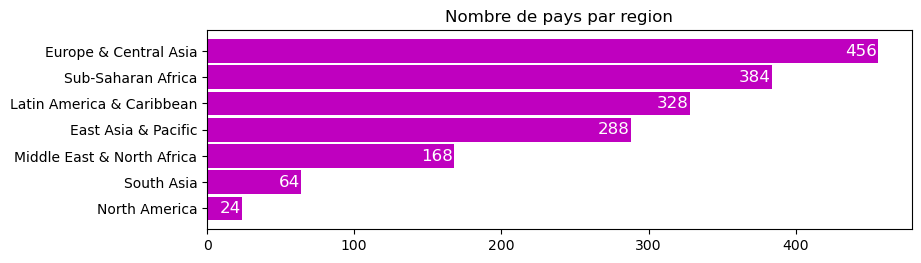

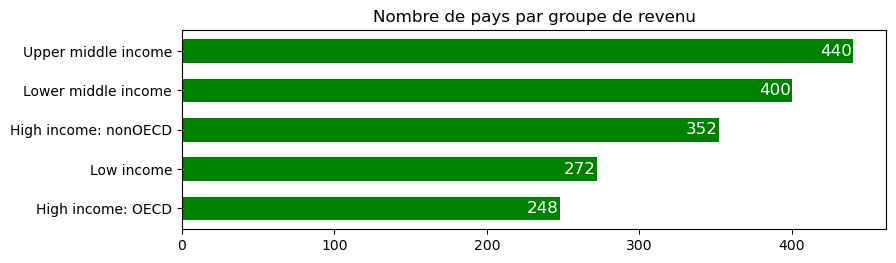

In [69]:
# Representation graphique des pays par region
plt.figure(figsize = (20,15))
plt.subplot(5,2,1)
plt.barh(Region_pays["Region"],Region_pays["Nombre pays"],color='m',height=0.9, align='center')
plt.title("Nombre de pays par region")

for y, x in enumerate(Region_pays["Nombre pays"]): 
        plt.annotate(str(np.around(x,decimals=2)), xy=(x-0.75, y), va='center',ha='right', color='white', 
                     fontsize=12)


# Representation graphique des pays par revenu
plt.figure(figsize = (20,15))
plt.subplot(5,2,2)
plt.barh(Region_revenu["Income Group"],Region_revenu["Nombre pays"],color='g',height=0.6)
plt.title("Nombre de pays par groupe de revenu")

for y, x in enumerate(Region_revenu["Nombre pays"]): 
        plt.annotate(str(np.around(x,decimals=2)), xy=(x-0.75, y), va='center',ha='right', color='white', 
                     fontsize=12)
plt.show() 

###  <span style='color:blue'> Nombre de données par région et par groupe de revenu de 2005-2015 </span>

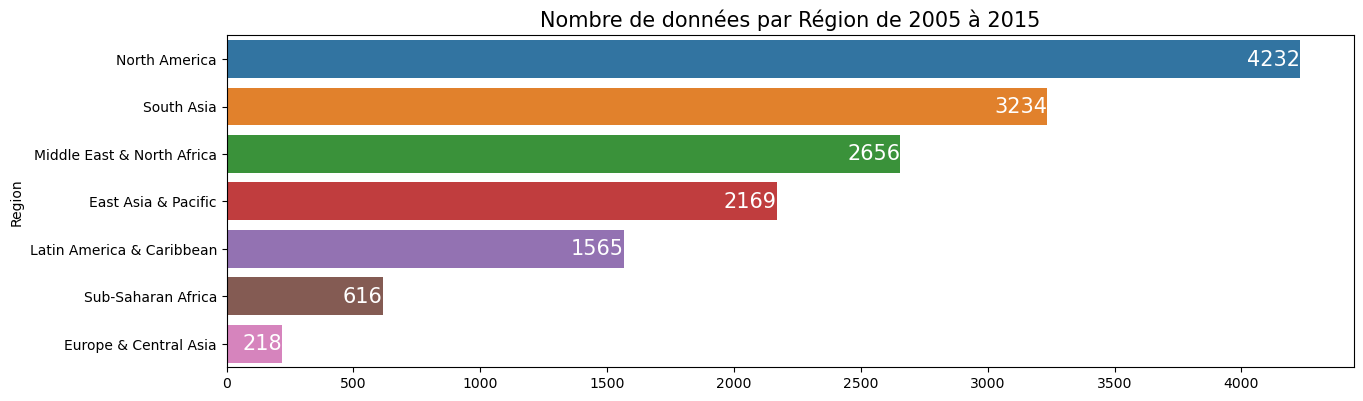

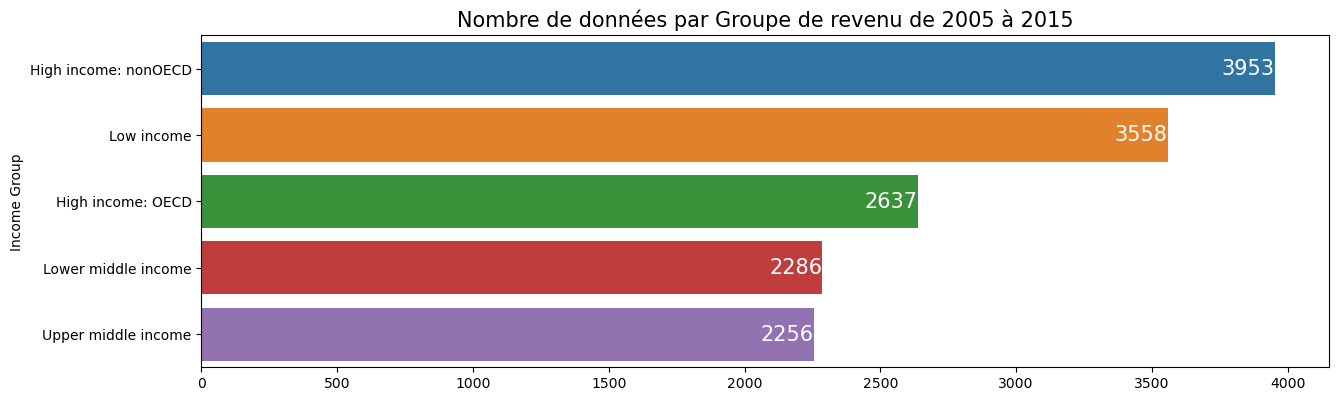

In [70]:
plt.figure(figsize=(32, 25))
plt.subplot(5,2,1)
#Representation nombre de données par région de 2005 à 2015
plt.title('Nombre de données par Région de 2005 à 2015', size=15)
annees=['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012','2013', '2014','2015']
plot = sns.barplot(x = df_final.groupby('Region')[annees].count().sum(axis=1).sort_values(ascending = False).values, 
                   y = df_final.groupby('Region')[annees].count().sum(axis=1).sort_values().index)
for y, x in enumerate( df_final.groupby('Region')[annees].count().sum(axis=1).sort_values(ascending = False).values): 
        plt.annotate(str(np.around(x,decimals=2)), xy=(x-0.75, y), va='center',ha='right', color='white', 
                     fontsize=15)

#Representation nombre de données per Groupe de revenu de 2005 à 2015
plt.figure(figsize=(32, 25))
plt.subplot(5,2,2)
plt.title('Nombre de données par Groupe de revenu de 2005 à 2015', size=15)
annees=['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012','2013', '2014','2015']
plot = sns.barplot(x = df_final.groupby('Income Group')[annees].count().sum(axis=1).sort_values(ascending = False).values, 
                   y = df_final.groupby('Income Group')[annees].count().sum(axis=1).sort_values().index)
for y, x in enumerate( df_final.groupby('Income Group')[annees].count().sum(axis=1).sort_values(ascending = False).values): 
        plt.annotate(str(np.around(x,decimals=2)), xy=(x-0.75, y), va='center',ha='right', color='white', 
                     fontsize=15)

plt.show()

### <span style='color:SteelBlue'>Ajout de la moyenne et pivotement des données sur la période 2005-2015 </span>

In [71]:
# Ajout de la moyenne
df_mean = df_final.copy()
df_mean ['Moyenne_donnee'] = df_mean .mean(numeric_only=True, axis=1)
df_mean_f=df_mean[["Region","Income Group","Country Name","Indicator Code","Moyenne_donnee"]]

In [72]:
#Pivotement de la table
df_mean_pivot= df_mean_f.pivot_table(index=['Country Name'], columns='Indicator Code', values='Moyenne_donnee')
df_mean_pivot

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,NY.GNP.PCAP.CD,SE.SEC.ENRL,SE.SEC.ENRR,SE.SEC.ENRR.UP,SE.TER.ENRL,SP.POP.1524.TO.UN
Country Name,,,,,,,,
Afghanistan,4.203256,486.471484,480.909091,1.849477e+06,45.389368,31.256946,1.518543e+05,6.086033e+06
Albania,38.632626,3955.240067,3978.181818,3.675455e+05,87.746059,78.387342,1.212754e+05,5.922224e+05
Algeria,16.352829,4530.246695,4342.727273,4.113231e+06,85.101859,52.518257,1.099195e+06,7.112625e+06
American Samoa,NaN,10483.624257,NaN,NaN,NaN,NaN,1.607000e+03,NaN
Andorra,76.475185,42083.437745,NaN,4.049364e+03,NaN,NaN,4.614286e+02,8.589500e+03
...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),35.850145,39421.666474,NaN,NaN,NaN,NaN,2.488000e+03,NaN
West Bank and Gaza,35.613927,2263.681511,2403.636364,7.022624e+05,86.132220,73.548503,1.906709e+05,8.833678e+05
"Yemen, Rep.",12.317576,1247.045456,1081.818182,1.596978e+06,45.269397,36.151295,2.433257e+05,5.322463e+06


##  <span style='color:purple'> Traitement de la base final df_mean_pivot </span>

In [73]:
df = df_mean_pivot.copy()

In [74]:
# Nombre de lignes et de colonnes
df.shape

(213, 8)

### Présence de données dupliquées

In [75]:
print(f'''Nombre de lignes entieèrement dupliquées: {df.duplicated().sum()}''')

Nombre de lignes entieèrement dupliquées: 0


In [76]:
print(f'''Nombre de colonnes: {df.duplicated(['IT.NET.USER.P2','NY.GDP.PCAP.CD','NY.GNP.PCAP.CD', 
       'SE.SEC.ENRL','SE.SEC.ENRR','SE.SEC.ENRR.UP', 'SE.TER.ENRL','SP.POP.1524.TO.UN']).sum()}''')

Nombre de colonnes: 0


### Présence de données manquantes

In [77]:
print(f'''Nombre total données manquantes: {df.isna().sum().sum()}''')
print(f''' % données manquantes {(df.isna().sum().sum()/(EdStatsCountry.size))*100:.2f}%''')

Nombre total données manquantes: 157
 % données manquantes 2.04%


###  <span style='color:blue'>Recherche et Suppression des lignes (pays) avec moins d'indicateurs renseignés </span>

In [78]:
# Nombre de données manquantes par lignes
q=df.isnull().sum(axis=1)
q = q.to_frame('Nb_NaN')
# Affichage des pays ayant au moins 30% de données manqauantes 30%*8indicateur egale environ 3
cond=q['Nb_NaN']>=3
q[cond]

,Nb_NaN
Country Name,
American Samoa,6
Andorra,3
Azerbaijan,3
Cayman Islands,3
Channel Islands,6
Curacao,4
Faroe Islands,6
French Polynesia,7
Gabon,4


In [79]:
len(q[cond])

26

*On a au total 26 pays à supprimer*.

In [80]:
# Recuperation des pays ou index à supprimer
pays_supr=q[cond].index.to_list()

In [81]:
#Suppression des lignes
df.drop(index=pays_supr,axis=0, inplace=True)
df.shape

(187, 8)

*Après Suppression des pays à ayant au moins 30% d'indicateurs non remplis, il nous reste 187 lignes et 8 colonnes*

###  <span style='color:blue'>Recherche et Suppression des colonnes (indicateurs) avec plus de 30% de données manquantes </span>

In [82]:
# % des données manquantes par colonnes
p=df.isnull().sum()
p = p.to_frame('NaN')
p['%NaN']= (p['NaN']/p['NaN'].sum())*100
# selection des colonnes ayant plus de 30% de données manquantes
p[p['%NaN']>=30]

,NaN,%NaN
Indicator Code,,
SE.TER.ENRL,18,52.941176


*L'indicateur **SE.TER.ENRL** doit être supprimé car elle contient 52% de données manquantes* 

In [83]:
#Suppression des lignes
df.drop(columns='SE.TER.ENRL',axis=1, inplace=True)
df.shape

(187, 7)

###  <span style='color:blue'> Correction des données manquantes par la médiane </span>

In [84]:
# Remplacement des valeurs manquantes par la mediane de chaque colonne
df.fillna(df.median(), inplace=True)

In [85]:
#Verification après correction des données manquantes
df.isna().sum().sum()

0

###  <span style='color:blue'> Detection des outliers </span>

Il existe plusieurs méthodes de détecter les outliers dans un dataframe: méthodes de visualisations (boîte à moustache, nuages de point), et la methode de Z score et bien d'autre . Dans notre cas nous utilisons la méthode du Z score pour detecter les données abberantes.

Le Z scoreest est une grandeur statistique qui  aide à comprendre si une observation est supérieure ou inférieure à la moyenne et à quelle distance elle se trouve de la moyenne. Plus précisément, le Z score indique l'ecart entre une observation et la moyenne. Généralemnt si le Z score d'une observtion est supérieur à 3, cela indique que cette observation est assez différent des autres points de données et un tel point de données peut être une valeur aberrante. (NB: le seuil 3 est une convention).

In [86]:
df.columns

Index(['IT.NET.USER.P2', 'NY.GDP.PCAP.CD', 'NY.GNP.PCAP.CD', 'SE.SEC.ENRL',
       'SE.SEC.ENRR', 'SE.SEC.ENRR.UP', 'SP.POP.1524.TO.UN'],
      dtype='object', name='Indicator Code')

###  <span style='color:blue'> Calcul des Z score pour chaque indicateur </span>

In [87]:
#IT.NET.USER.P2
# Calcul de la borne sup et inf
sup1=df['IT.NET.USER.P2'].mean() + 3*df['IT.NET.USER.P2'].std()
inf1=df['IT.NET.USER.P2'].mean() - 3*df['IT.NET.USER.P2'].std()
# selection des lignes contenant des données aberrantes
df[(df['IT.NET.USER.P2'] > sup1) | (df['IT.NET.USER.P2'] < inf1)]

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,NY.GNP.PCAP.CD,SE.SEC.ENRL,SE.SEC.ENRR,SE.SEC.ENRR.UP,SP.POP.1524.TO.UN
Country Name,,,,,,,


In [88]:
#NY.GDP.PCAP.CD
# Calcul de la borne sup et inf
sup2=df['NY.GDP.PCAP.CD'].mean() + 3*df['NY.GDP.PCAP.CD'].std()
inf2=df['NY.GDP.PCAP.CD'].mean() - 3*df['NY.GDP.PCAP.CD'].std()
# selection des lignes contenant des données aberrantes
df[(df['NY.GDP.PCAP.CD'] > sup2) | (df['NY.GDP.PCAP.CD'] < inf2)]

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,NY.GNP.PCAP.CD,SE.SEC.ENRL,SE.SEC.ENRR,SE.SEC.ENRR.UP,SP.POP.1524.TO.UN
Country Name,,,,,,,
Bermuda,84.501475,86455.598502,111414.285714,4318.000000,76.010968,69.876780,7.102000e+03
Liechtenstein,79.793148,144353.574215,109174.000000,3244.100000,109.888327,120.396286,1.231320e+06
Luxembourg,86.304580,105028.503651,76999.090909,41510.111111,99.198363,90.051476,5.993891e+04
Norway,91.255787,88006.042889,88010.909091,427936.545455,112.864326,126.231368,6.186391e+05


In [89]:
#NY.GNP.PCAP.CD
# Calcul de la borne sup et inf
sup3=df['NY.GNP.PCAP.CD'].mean() + 3*df['NY.GNP.PCAP.CD'].std()
inf3=df['NY.GNP.PCAP.CD'].mean() - 3*df['NY.GNP.PCAP.CD'].std()
# selection des lignes contenant des données aberrantes
df[(df['NY.GNP.PCAP.CD'] > sup3) | (df['NY.GNP.PCAP.CD'] < inf3)]


Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,NY.GNP.PCAP.CD,SE.SEC.ENRL,SE.SEC.ENRR,SE.SEC.ENRR.UP,SP.POP.1524.TO.UN
Country Name,,,,,,,
Bermuda,84.501475,86455.598502,111414.285714,4318.000000,76.010968,69.876780,7.102000e+03
Liechtenstein,79.793148,144353.574215,109174.000000,3244.100000,109.888327,120.396286,1.231320e+06
Luxembourg,86.304580,105028.503651,76999.090909,41510.111111,99.198363,90.051476,5.993891e+04
Norway,91.255787,88006.042889,88010.909091,427936.545455,112.864326,126.231368,6.186391e+05
Switzerland,81.728371,74436.032374,74672.727273,601385.727273,96.852188,87.464438,9.425225e+05


In [90]:
#SE.SEC.ENRL
# Calcul de la borne sup et inf
sup4=df['SE.SEC.ENRL'].mean() + 3*df['SE.SEC.ENRL'].std()
inf4=df['SE.SEC.ENRL'].mean() - 3*df['SE.SEC.ENRL'].std()
# selection des lignes contenant des données aberrantes
df[(df['SE.SEC.ENRL'] > sup4) | (df['SE.SEC.ENRL'] < inf4)]

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,NY.GNP.PCAP.CD,SE.SEC.ENRL,SE.SEC.ENRR,SE.SEC.ENRR.UP,SP.POP.1524.TO.UN
Country Name,,,,,,,
China,31.40423,4838.215749,4611.818182,9.656850e+07,84.934605,71.857591,2.139920e+08
India,10.08124,1225.019431,1207.272727,1.089890e+08,63.918232,51.382874,2.335402e+08


In [91]:
#SE.SEC.ENRR
# Calcul de la borne sup et inf
sup5=df['SE.SEC.ENRR'].mean() + 3*df['SE.SEC.ENRR'].std()
inf5=df['SE.SEC.ENRR'].mean() - 3*df['SE.SEC.ENRR'].std()
# selection des lignes contenant des données aberrantes
df[(df['SE.SEC.ENRR'] > sup5) | (df['SE.SEC.ENRR'] < inf5)]

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,NY.GNP.PCAP.CD,SE.SEC.ENRL,SE.SEC.ENRR,SE.SEC.ENRR.UP,SP.POP.1524.TO.UN
Country Name,,,,,,,


In [92]:
#SE.SEC.ENRR.UP
# Calcul de la borne sup et inf
sup6=df['SE.SEC.ENRR.UP'].mean() + 3*df['SE.SEC.ENRR.UP'].std()
inf6=df['SE.SEC.ENRR.UP'].mean() - 3*df['SE.SEC.ENRR.UP'].std()
# selection des lignes contenant des données aberrantes
df[(df['SE.SEC.ENRR.UP'] > sup6) | (df['SE.SEC.ENRR.UP'] < inf6)]


Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,NY.GNP.PCAP.CD,SE.SEC.ENRL,SE.SEC.ENRR,SE.SEC.ENRR.UP,SP.POP.1524.TO.UN
Country Name,,,,,,,
Australia,75.533792,51990.221167,48696.363636,2309351.3,133.922543,174.798636,2.893898e+06


In [93]:
#SP.POP.1524.TO.UN
# Calcul de la borne sup et inf
sup7=df['SP.POP.1524.TO.UN'].mean() + 3*df['SP.POP.1524.TO.UN'].std()
inf7=df['SP.POP.1524.TO.UN'].mean() - 3*df['SP.POP.1524.TO.UN'].std()
# selection des lignes contenant des données aberrantes
df[(df['SP.POP.1524.TO.UN'] > sup7) | (df['SP.POP.1524.TO.UN'] < inf7)]

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,NY.GNP.PCAP.CD,SE.SEC.ENRL,SE.SEC.ENRR,SE.SEC.ENRR.UP,SP.POP.1524.TO.UN
Country Name,,,,,,,
China,31.40423,4838.215749,4611.818182,9.656850e+07,84.934605,71.857591,2.139920e+08
India,10.08124,1225.019431,1207.272727,1.089890e+08,63.918232,51.382874,2.335402e+08


En conclusion les indicateurs  **NY.GDP.PCAP.CD, NY.GNP.PCAP.CD, SE.SEC.ENRL et  SP.POP.1524.TO.UN** contiennent des données abérrantes qu'on va par la suite supprimé

 Pays à supprimé pour l'indicateur **NY.GDP.PCAP.CD :** Bermuda, Liechtenstein, Luxembourg, Norway

 Pays à supprimé pour l'indicateur **NY.GNP.PCAP.CD:** Bermuda, Liechtenstein, Luxembourg, Norway, Switzerland

 Pays à supprimé pour l'indicateur  **SE.SEC.ENRL:** China, India

 Pays à supprimé pour l'indicateur  **SP.POP.1524.TO.UN:** China, India

Au total, 05 pays sont à supprimés: **Bermuda, Liechtenstein, Luxembourg, Norway, Switzerland, China, India**. Bien vrai que la chine et l'inde soient respectivement les 1er et 2ème pays les plus peuplés au monde, leur leur population tourne **actuellement** autour de 1 milliard 400 millions et 1 milliard 300 millions or dans la base ces deux sont à plus de 02 milliards de populations; il s'agit effectivement des valeurs abberantes et non de la rélaité.

###  <span style='color:blue'> Suppression des valeurs abberantes </span>

In [94]:
#Suppression des valeurs aberrante
df.drop(index=['Bermuda', 'Liechtenstein', 'Luxembourg', 'Norway', 'Switzerland', 'China', 'India'],axis=0, inplace=True)
df.shape

(180, 7)

##  <span style='color:purple'> Statistique descriptive univarié </span>

In [95]:
#Calcul des grandeurs statistiques
df.describe()

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.CD,NY.GNP.PCAP.CD,SE.SEC.ENRL,SE.SEC.ENRR,SE.SEC.ENRR.UP,SP.POP.1524.TO.UN
count,180.000000,180.000000,180.000000,1.800000e+02,180.000000,180.000000,1.800000e+02
mean,31.679735,11847.278165,11003.850283,1.826096e+06,77.452677,68.671108,4.059358e+06
std,25.135688,15986.221761,14952.974425,3.559908e+06,27.852311,33.382659,7.439337e+06
min,0.000000,231.047198,216.363636,1.245000e+03,7.353040,5.979781,2.778500e+03
25%,9.031161,1368.634318,1348.409091,1.206625e+05,54.432988,37.623909,4.428765e+05
50%,27.050128,4691.181700,4546.363636,5.670801e+05,87.746059,75.940235,1.231320e+06
75%,49.543788,13209.601207,12486.136364,1.872407e+06,97.780183,92.155866,4.482060e+06
max,93.494208,73592.682842,66630.000000,2.437875e+07,133.922543,174.798636,4.462605e+07


- L'indicateur IT.NET.USER.P2 contient 180 observations. Avec un ecart type de 25,13, le nombre median d'utilisateur d'internet pour les 187 pays est de 27,05 et varie entre 0 et 93


- L'indicateur NY.GDP.PCAP.CD contient 180 observations. Avec un ecart type de 15986.22, le PIB median est de 4691.18 et varie entre 231.04 et 73592.68


- L'indicateur NY.GNP.PCAP.CD contient 180 observations. Avec un ecart type de 14952.97, le RNB median est de 4546.36 et varie entre 216 et 66630


- L'indicateur SE.SEC.ENRL contient 180 observations. Avec un ecart type de 3.559908e+06, le nombre median d'etudiant incrit est de 5.670801e+05 et varie entre 1.245000e+03 et 2.437875e+07	


- L'indicateur SE.SEC.ENRR contient 180 observations. Avec un ecart type de 27.85, le nombre median d'inscrit au secondaire est de 87.74 et varie entre 7.35 et 133.922543


- L'indicateur SE.SEC.ENRR.UP contient 180 observations. Avec un ecart type de 33.38, le nombre median d'inscrit au supérieur  est de75.94 et varie entre 5.97 et 174.79


- L'indicateur SP.POP.1524.TO.UN contient 180 observations. Avec un ecart type de 7.439337e+06, le nombre median de population âgé de 15-24 ans est de 1.231320e+06 et varie entre 2.778500e+03 et 4.462605e+07	

###  <span style='color: blue'> Distribution des indicateurs </span>

Text(0.5, 0, 'SP.POP.1524.TO.UN')

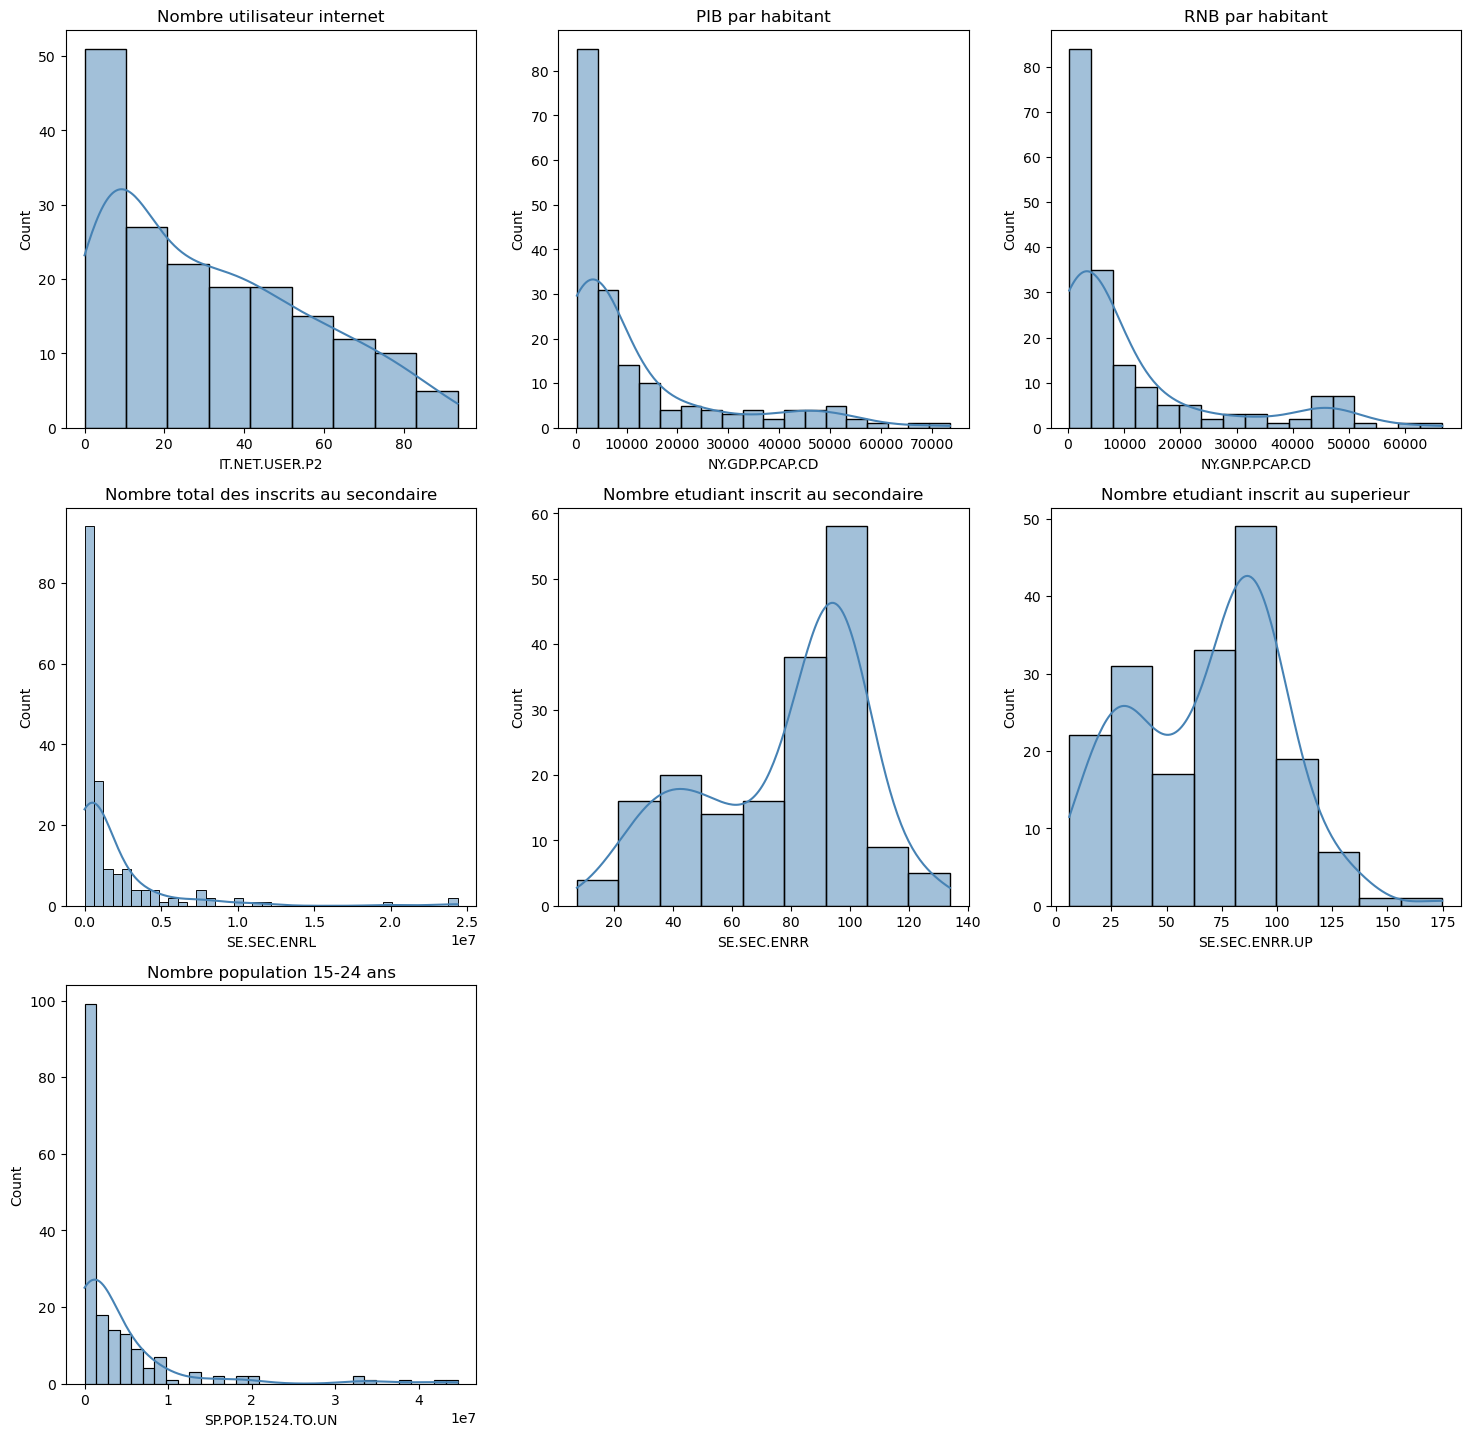

In [96]:
#Graphiques statistiques sur les indicateurs  
plt.figure(figsize = (18,30))



#IT.NET.USER.P2
plt.subplot(5,3,1)
sns.histplot(df['IT.NET.USER.P2'], kde = True, color='SteelBlue')
plt.title('Nombre utilisateur internet')
plt.xlabel('IT.NET.USER.P2')


#NY.GDP.PCAP.CD
plt.subplot(5,3,2)
sns.histplot(df['NY.GDP.PCAP.CD'], kde = True, color='SteelBlue')
plt.title('PIB par habitant')
plt.xlabel('NY.GDP.PCAP.CD')


#NY.GNP.PCAP.CD
plt.subplot(5,3,3)
sns.histplot(df['NY.GNP.PCAP.CD'], kde = True, color='SteelBlue')
plt.title('RNB par habitant')
plt.xlabel('NY.GNP.PCAP.CD')


#SE.SEC.ENRL
plt.subplot(5,3,4)
sns.histplot(df['SE.SEC.ENRL'], kde = True, color='SteelBlue')
plt.title('Nombre total des inscrits au secondaire')
plt.xlabel('SE.SEC.ENRL')


#SE.SEC.ENRR
plt.subplot(5,3,5)
sns.histplot(df['SE.SEC.ENRR'], kde = True, color='SteelBlue')
plt.title('Nombre etudiant inscrit au secondaire')
plt.xlabel('SE.SEC.ENRR')


#SE.SEC.ENRR.UP
plt.subplot(5,3,6)
sns.histplot(df['SE.SEC.ENRR.UP'], kde = True, color='SteelBlue')
plt.title('Nombre etudiant inscrit au superieur')
plt.xlabel('SE.SEC.ENRR.UP')


#SP.POP.1524.TO.UN
plt.subplot(5,3,7)
sns.histplot(df['SP.POP.1524.TO.UN'], kde = True, color='SteelBlue')
plt.title('Nombre population 15-24 ans')
plt.xlabel('SP.POP.1524.TO.UN')


- Les courbes des indicateurs **IT.NET.USER.P2,NY.GDP.PCAP.CD, NY.GNP.PCAP.CD, SE.SEC.ENRL et SP.POP.1524.TO.UN** sont étalées à droite; Les coefficients d'asymétries (skewness en anglais) des differentes indicateurs sont positifs et les coefficients d'applatissements ou Kurtosis sont également positifs; Ce qui signifie que les distributions de ces differentes indicateurs sont moins aplaties que celle de la distribution normale.


- Les courbes des indicateurs **SE.SEC.ENRR et SE.SEC.ENRR.UP** sont bimodales et étalées à gauche. Les skewness de ces 02 indicateurs sont negatifs et leur distribution est plus aplatie que la distribution normale (kurtosis négatif egalement).


- <span style='color: green'>Aucune distribution de ces indicateurs ne suit pas la loi normale.</span>

##  <span style='color:purple'>  Etude de la correlation entre les indicateurs </span>

<AxesSubplot:xlabel='Indicator Code', ylabel='Indicator Code'>

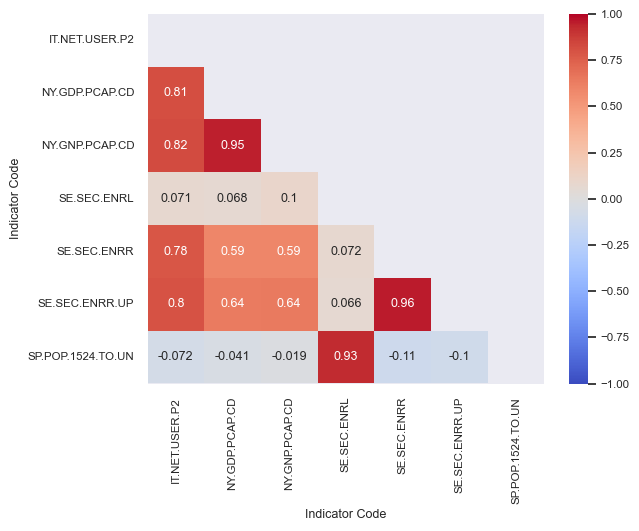

In [97]:
# Répresentation graphique de la matrice de corrélation
sns.set(font_scale=0.75)
matrice_correlation = np.triu(df.corr())
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = matrice_correlation )


La matrice de correlation ci-dessus nous indique de nombreuses corrélations (coefficient de corrélation>=0,7) et donc une forte redondance entre les indicateurs. Nous devrons donc retirer l'un des indicateur pour les couples d'indicateur ayant au moins 0,7 de coefficient de corrélation. Ainsi il nous reste les variables: <span style='color: red'>IT.NET.USER.P2, NY.GNP.PCAP.CD, SE.SEC.ENRR.UP et SP.POP.1524.TO.UN</span> pour determiner le potentiel par pays.

###  <span style='color: blue'> Graphique de correlation entre les indicateurs fortement correélés </span>

Text(0.5, 1.0, 'SE.SEC.ENRR & SE.SEC.ENRR.UP')

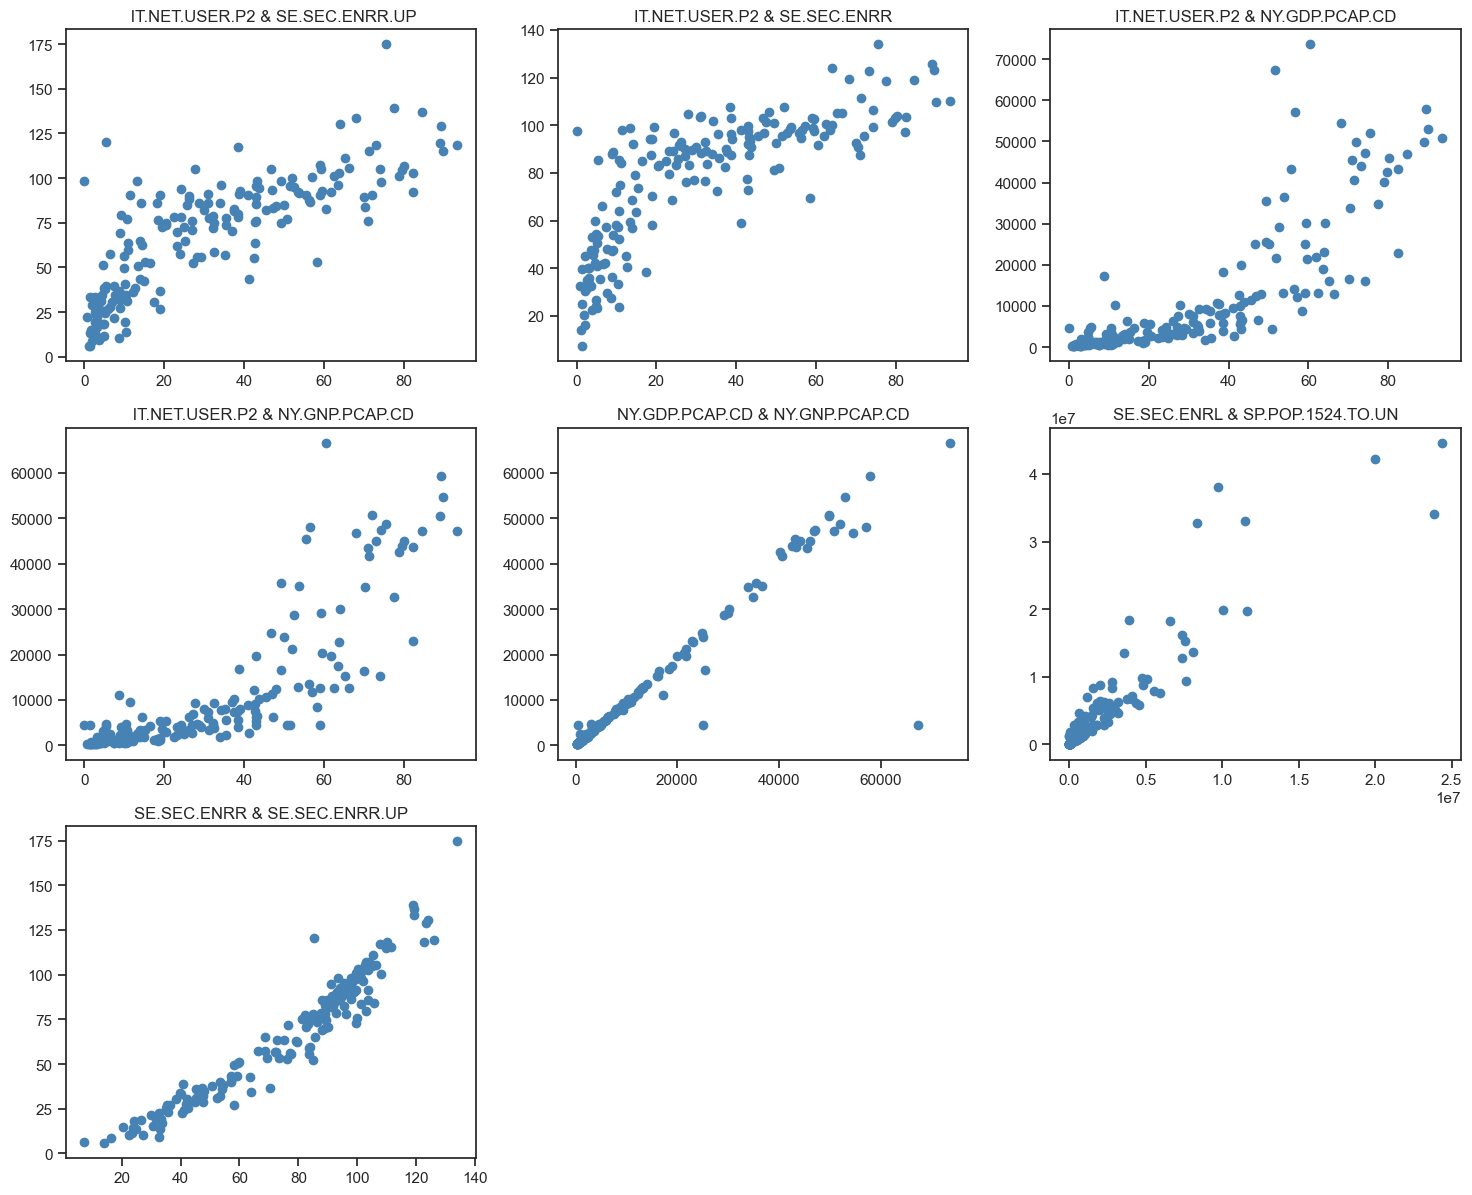

In [111]:
#Graphiques statistiques sur les 3 indicateurs  
plt.figure(figsize = (18,25))



#IT.NET.USER.P2
plt.subplot(5,3,1)
plt.scatter(df['IT.NET.USER.P2'], df['SE.SEC.ENRR.UP'], color='SteelBlue')
plt.title(' IT.NET.USER.P2 & SE.SEC.ENRR.UP')


#NY.GDP.PCAP.CD
plt.subplot(5,3,2)
plt.scatter(df['IT.NET.USER.P2'], df['SE.SEC.ENRR'], color='SteelBlue')
plt.title('IT.NET.USER.P2 & SE.SEC.ENRR')

#NY.GNP.PCAP.CD
plt.subplot(5,3,3)
plt.scatter(df['IT.NET.USER.P2'], df['NY.GDP.PCAP.CD'], color='SteelBlue')
plt.title('IT.NET.USER.P2 & NY.GDP.PCAP.CD')


#SE.SEC.ENRL
plt.subplot(5,3,4)
plt.scatter(df['IT.NET.USER.P2'], df['NY.GNP.PCAP.CD'], color='SteelBlue')
plt.title(' IT.NET.USER.P2 & NY.GNP.PCAP.CD')


#SE.SEC.ENRR
plt.subplot(5,3,5)
plt.scatter(df['NY.GDP.PCAP.CD'], df['NY.GNP.PCAP.CD'], color='SteelBlue')
plt.title('NY.GDP.PCAP.CD & NY.GNP.PCAP.CD')

#SE.SEC.ENRR.UP
plt.subplot(5,3,6)
plt.scatter(df['SE.SEC.ENRL'], df['SP.POP.1524.TO.UN'], color='SteelBlue')
plt.title('SE.SEC.ENRL & SP.POP.1524.TO.UN')


#SP.POP.1524.TO.UN
plt.subplot(5,3,7)
plt.scatter(df['SE.SEC.ENRR'], df['SE.SEC.ENRR.UP'], color='SteelBlue')
plt.title('SE.SEC.ENRR & SE.SEC.ENRR.UP')

In [99]:
#Selection des indicateurs finaux
list_indicateur_final=['IT.NET.USER.P2', 'NY.GNP.PCAP.CD', 'SE.SEC.ENRR.UP', 'SP.POP.1524.TO.UN']
dff=df[list_indicateur_final]
dff.head(5)
dff.shape

(180, 4)

 # <span style='color:SteelBlue'> Pays potentiels </span>

###  <span style='color: blue'> Mise à l'échelle ou Normalisation des données </span>

On a au total 04 indicateurs dont les unités de mesure ne sont pas les mêmes (car elles ne se collectent pas de la même sorte) et les minimum et maximum des indicateurs observés qui varient considerablement d'un à un autre; nous allons donc ramener les données à la même échelle.

In [100]:
# Normalisation
for column in dff.columns:
    dff[column] = (dff[column] - dff[column].min()) / (dff[column].max() - dff[column].min())    
dff.head(180)

C:\Users\gansane080944\AppData\Local\Temp\ipykernel_11780\3753645867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[column] = (dff[column] - dff[column].min()) / (dff[column].max() - dff[column].min())


Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.CD,SE.SEC.ENRR.UP,SP.POP.1524.TO.UN
Country Name,,,,
Afghanistan,0.044957,0.003983,0.149730,0.136325
Albania,0.413209,0.056642,0.428907,0.013209
Algeria,0.174907,0.062131,0.275671,0.159330
Angola,0.050993,0.043255,0.073668,0.084185
Antigua and Barbuda,0.514548,0.184341,0.463630,0.000239
...,...,...,...,...
Vanuatu,0.109634,0.035770,0.205646,0.001063
"Venezuela, RB",0.396327,0.139651,0.382440,0.120482
West Bank and Gaza,0.380921,0.032934,0.400244,0.019734


###  <span style='color: blue'> Définition des poids</span>

**Poids des indicateurs:**                            

IT.NET.USER.P2 = **40**

NY.GDP.PCAP.CD = **15**

SE.SEC.ENRR.UP = **25**

SP.POP.1524.TO.UN = **20**

In [101]:
# Calcul du score
dff['Country Name']=dff.index
dff['Score']=[((row[0] *40 + row[1] *15 + row[2] *25 + row[3] *20)/100) for row in zip(dff['IT.NET.USER.P2'], dff['NY.GNP.PCAP.CD'], dff['SE.SEC.ENRR.UP'], dff['SP.POP.1524.TO.UN'])]
p=dff.sort_values(by='Score',ascending=False).head(10)
p

C:\Users\gansane080944\AppData\Local\Temp\ipykernel_11780\2791806316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Country Name']=dff.index
C:\Users\gansane080944\AppData\Local\Temp\ipykernel_11780\2791806316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Score']=[((row[0] *40 + row[1] *15 + row[2] *25 + row[3] *20)/100) for row in zip(dff['IT.NET.USER.P2'], dff['NY.GNP.PCAP.CD'], dff['SE.SEC.ENRR.UP'], dff['SP.POP.1524.TO.UN'])]


Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.CD,SE.SEC.ENRR.UP,SP.POP.1524.TO.UN,Country Name,Score
Country Name,,,,,,
United States,0.770075,0.760071,0.500034,1.000000,United States,0.747049
Denmark,0.956812,0.888208,0.729298,0.014781,Denmark,0.701237
Australia,0.807898,0.729971,1.000000,0.064790,Australia,0.695613
Sweden,0.962105,0.819520,0.646048,0.026431,Sweden,0.674568
Iceland,1.000000,0.707056,0.666777,0.000932,Iceland,0.672939
Netherlands,0.952822,0.757416,0.672536,0.044506,Netherlands,0.671776
Finland,0.905284,0.708589,0.775295,0.014548,Finland,0.665135
Japan,0.844438,0.636904,0.565061,0.287956,Japan,0.632168
United Kingdom,0.882091,0.655000,0.572584,0.177762,United Kingdom,0.629785


In [102]:
Potentiel=p['Score']
Potentiel= Potentiel.to_frame()
Potentiel.reset_index(inplace = True)
Potentiel

,Country Name,Score
0,United States,0.747049
1,Denmark,0.701237
2,Australia,0.695613
3,Sweden,0.674568
4,Iceland,0.672939
5,Netherlands,0.671776
6,Finland,0.665135
7,Japan,0.632168
8,United Kingdom,0.629785
9,Germany,0.626913


In [103]:
Pays_potentiel=['United States', 'Denmark', 'Australia', 'Sweden', 'Iceland',
       'Netherlands', 'Finland', 'Japan', 'United Kingdom', 'Germany']
code_pays=EdStatsCountry[['Country Code']][EdStatsCountry['Short Name'].isin(Pays_potentiel)]
code_pays=code_pays['Country Code'].to_list()
code_pays

['AUS', 'DEU', 'DNK', 'FIN', 'GBR', 'ISL', 'JPN', 'NLD', 'SWE', 'USA']

In [104]:
region_income=df_final[df_final['Country Code'].isin(code_pays)][['Country Name','Region','Income Group']]
region_income.drop_duplicates(inplace=True)
region_income.set_index('Country Name', inplace=True)
region_income.sort_values(by='Region', inplace=True)
region_income.reset_index(inplace = True)
region_income

,Country Name,Region,Income Group
0,Australia,East Asia & Pacific,High income: OECD
1,Japan,East Asia & Pacific,High income: OECD
2,Germany,Europe & Central Asia,High income: OECD
3,Denmark,Europe & Central Asia,High income: OECD
4,Finland,Europe & Central Asia,High income: OECD
5,United Kingdom,Europe & Central Asia,High income: OECD
6,Iceland,Europe & Central Asia,High income: OECD
7,Netherlands,Europe & Central Asia,High income: OECD
8,Sweden,Europe & Central Asia,High income: OECD
9,United States,North America,High income: OECD


In [105]:
Potentiel_region_income = pd.merge(region_income,                        
                      Potentiel,
                      on = "Country Name",
                      how = "left")
Potentiel_region_income.sort_values(by='Score',ascending=False).head(10)

,Country Name,Region,Income Group,Score
9,United States,North America,High income: OECD,0.747049
3,Denmark,Europe & Central Asia,High income: OECD,0.701237
0,Australia,East Asia & Pacific,High income: OECD,0.695613
8,Sweden,Europe & Central Asia,High income: OECD,0.674568
6,Iceland,Europe & Central Asia,High income: OECD,0.672939
7,Netherlands,Europe & Central Asia,High income: OECD,0.671776
4,Finland,Europe & Central Asia,High income: OECD,0.665135
1,Japan,East Asia & Pacific,High income: OECD,0.632168
5,United Kingdom,Europe & Central Asia,High income: OECD,0.629785
2,Germany,Europe & Central Asia,High income: OECD,0.626913


In [106]:
# Retention TOP 10 des pays selon le score
potentiel=dff['Score'].nlargest(n=10)
potentiel.head(10)
potentiel.index

pays_potentiel=['United States', 'Denmark', 'Australia', 'Sweden', 'Iceland',
       'Netherlands', 'Finland', 'Japan', 'United Kingdom', 'Germany']

**ToP 10 des pays ayant un fort potentiel classé selon le score le plus élévé**

- <span style='color: green'>United States</span>
- <span style='color: green'>Denmark</span>
- <span style='color: green'>Australia</span>
- <span style='color: green'>Sweden</span>
- <span style='color: green'>Iceland</span>
- <span style='color: green'>Netherlands</span>
- <span style='color: green'>Finland</span>
- <span style='color: green'>Japan</span>
- <span style='color: green'>United Kingdom</span>
- <span style='color: green'>Germany</span>

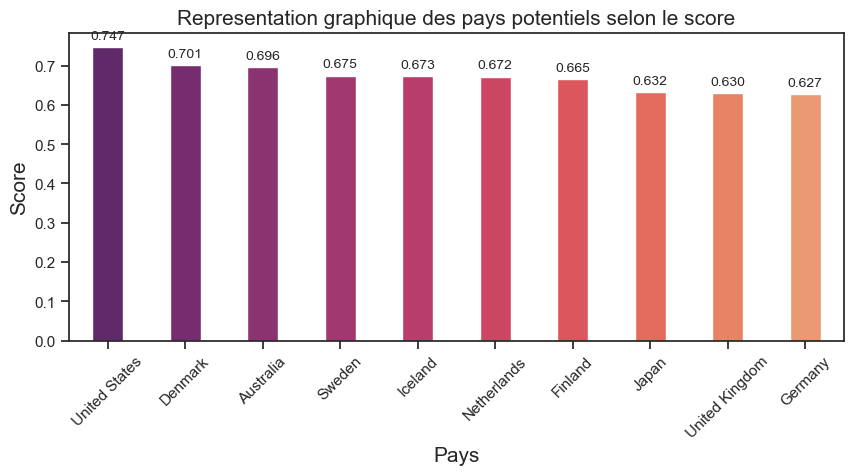

In [107]:
# Representation graphique des pays par score
plt.figure(figsize=(10, 4))
sns.set(style="ticks")
pal = sns.color_palette("flare", len(Potentiel_region_income))
#sns.set(style="whitegrid", color_codes=True)
plots = sns.barplot(x="Country Name", y="Score", data=Potentiel_region_income.sort_values('Score',ascending = False),
                    saturation=1, width=0.4,dodge=True,palette=np.array(pal[::-1]))
plots.set_xticklabels(plots.get_xticklabels(), rotation=45)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Representation graphique des pays potentiels selon le score", size=15)
plt.xlabel("Pays", size=15)
plt.ylabel("Score", size=15)
plt.show()

 # <span style='color:SteelBlue'> Prédiction </span>

In [108]:
# Verfication des prédiction pour les top 10
df_pred = EdStatsData.copy()
df_pred=df_pred[['Country Name', 'Indicator Code','2020','2025','2030','2035','2040','2045',
       '2050', '2055', '2060']]
# Filtre par codes indicateurs retenus et top 10 des pays potentiels
indicateurs=['IT.NET.USER.P2', 'NY.GNP.PCAP.CD', 'SE.SEC.ENRR.UP', 'SP.POP.1524.TO.UN']
pays_potentiel=['United States', 'Denmark', 'Australia', 'Sweden', 'Iceland',
       'Netherlands', 'Finland', 'Japan', 'United Kingdom', 'Germany']
df_pred=df_pred[['Country Name', 'Indicator Code','2020','2025','2030','2035','2040','2045',
       '2050', '2055', '2060']] [df_pred['Indicator Code'].isin(indicateurs)]
df_pred=df_pred[['Country Name', 'Indicator Code','2020','2025','2030','2035','2040','2045',
       '2050', '2055', '2060']] [df_pred['Country Name'].isin(pays_potentiel)]

In [109]:
df_pred

,Country Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060
129526,Australia,NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129618,Australia,SE.SEC.ENRR.UP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129650,Australia,IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130757,Australia,SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287121,Denmark,NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287213,Denmark,SE.SEC.ENRR.UP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287245,Denmark,IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288352,Denmark,SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334766,Finland,NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334858,Finland,SE.SEC.ENRR.UP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df_pred[['2020','2025','2030','2035','2040','2045','2050', '2055', '2060']].isna().sum().sum() == 0

False

**Il n'existe aucune données de predictions pour les indicateurs retenus et le top 10 des pays**